<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/AI%20and%20machine%20learning/6_%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D0%B8%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вспомним линейную регрессию

тут увеличением количества фичей смогли апроксимировать синусоиду


In [8]:
import numpy as np
import numpy.linalg 
import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [13]:
X = X.reshape(-1,1)
X_new = np.hstack((X , X ** 2, X ** 3)) 
X_new.shape

(30, 3)

A =  [ 1.58248309e-14 -1.33226763e-15  1.00000000e+00] B =  4.747160519086872e-14


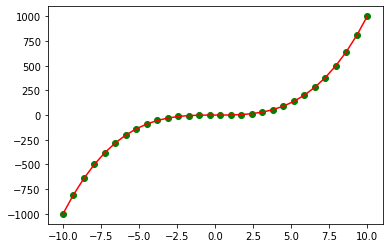

In [14]:
linreg = LinearRegression()
linreg.fit(X_new, y)
A = linreg.coef_ # тут теперь 3 значения
B = linreg.intercept_ 
print("A = ",A,"B = ", B)
plt.plot(X, y, 'go')
plt.plot(X, B + A[0] * X + A[1] * X ** 2 + A[2] * X ** 3, "r")

а что если бы был шум?

In [44]:
X = np.linspace(-10, 10, 20)
noise = np.random.normal(size = len(X)) # наш шум - для каждого значения Х 
print(noise)

[ 2.01071912 -0.6589334  -0.07775095  0.12378628  1.07628734 -0.0396768
  1.2058875  -1.11333695  0.34268967  1.39017416 -0.80948074  0.0957097
  0.1643591  -1.45185941 -0.14751165  1.53634433  0.24131686  0.64698647
 -0.55882573 -0.2842564 ]


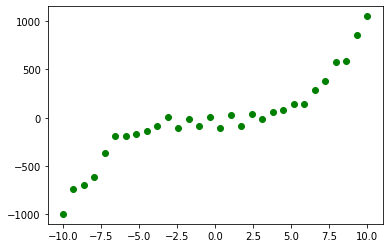

In [30]:
y = X ** 3 + 3 * X - 5 + 60 * noise
plt.plot(X, y, 'go')

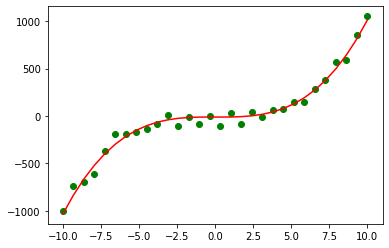

In [35]:
linreg = LinearRegression()
linreg.fit(np.vstack((X , X ** 3)).T, y)
A = linreg.coef_ # тут теперь 3 значения
B = linreg.intercept_
plt.plot(X, y, 'go')
plt.plot(X, B + A[0] * X + A[1]* X ** 3, "r")

Довольно хорошо

Увеличим разброс, через параметр scale

In [46]:
noise = np.random.normal(scale = 100, size = len(X))

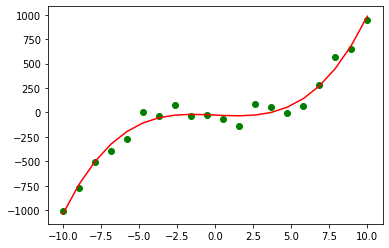

In [47]:
y = X ** 3 + 3 * X - 5 + noise
linreg = LinearRegression()
linreg.fit(np.vstack((X , X ** 3)).T, y)
A = linreg.coef_ # тут теперь 3 значения
B = linreg.intercept_
plt.plot(X, y, 'go')
plt.plot(X, B + A[0] * X + A[1]* X ** 3, "r")

Уже не совсем очевино, но норм

Попробуем сконструировать много разных фич

In [56]:
X_features = np.vstack(tuple(X ** i for i in range(20)))

In [57]:
X_features.shape

(25, 20)

Сделаем больше точек

In [59]:
X = np.linspace(-10, 10, 25)
X_features = np.hstack(tuple(X.reshape(25, 1) ** i for i in range(20)))
X_features.shape

(25, 20)

сделали разную размерность, чтоб их не путать

Пусть `X_features[:,1] = X`

In [61]:
X_features[:,1] = X

In [62]:
X_features[:,1] == X

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

Если везде True, то все правильно